# Project: No-show appoinments
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1 .Introduction


We will be working on the dataset 'No show appoinments' , This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.  
We will be looking at the factors that are important to predict if a patient will show up for their scheduled appointment.  

In [45]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas.util.testing as tm
pd.pandas.set_option('display.max_columns',None) 
import warnings
warnings.filterwarnings("ignore")

<a id='wrangling'></a>
## 2. Data Wrangling

#### 2.1 General Properties

In [2]:
#load the dataset
data = pd.read_csv("noshowappointments.csv")

In [3]:
# view dataframe
data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#inspect data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


    Data have 110527 rows and 14 columns, there are three datatypes: float, int, string .  
    'No-show' is taken as the dependent variable. We need to convert it to numerical to further ease up our analysis

In [5]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Statistical observation on the dataset.

    Mean age of the patient is 37. There is an error in age value as minimum is shown ''-1', it needs to be corrected.
    20% of patients have Hypertension
    9 % of patients have a scholarship, that is they are enrolled in a welfare program
    32% people recieved an message reminding the appoinment
    Age is said to have a minimum value -1, which needs investigation
    
    

In [6]:
#check for duplicates.
data.duplicated().value_counts()

False    110527
dtype: int64

    Data has zero duplicate rows.

##### Handling missing values

In [7]:
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

    The data is said to have zero missing values

#### 2.2 Cleaning data

In [8]:
x= data[data['Age'] == -1]
x

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


    There is one row with age = -1, this is an outlier. So we will delete the row with age = -1

In [9]:
# removing the row with age = -1
data = data[data.Age != -1]

In [10]:
#patientID and AppoinmentID are not found usedfull, so drop them
data.drop(['PatientId','AppointmentID'], axis = 1, inplace = True)

In [11]:
# schedule day and appointment day have time associated with data, let us remove that and make the data more meaningfull
#split column by T 
colu = ['ScheduledDay' , 'AppointmentDay']
for col in colu:
    data[col] = data[col].apply(lambda x : x.split('T')[0])

we will see whether the gap between the scheduled day and the appointment day affect patients showing up for their appointments. We will add a new column with the difference in scheduled day and appointment day

In [12]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

In [13]:
# add a new column with difference in appointment day and scheduled day
data["Appoinment_Gap"] = data['AppointmentDay'].dt.date - data['ScheduledDay'].dt.date
data['Appoinment_Gap'] = data['Appoinment_Gap'].apply(lambda x : x.days)

In [14]:
data.head()
data['Appoinment_Gap'].describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Appoinment_Gap, dtype: float64

    minimum value of appoinment gap us -6, which cannot be true, needs further analyis

In [15]:

x = data[data['Appoinment_Gap']< 0]
x

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Appoinment_Gap
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


###### SceduledDay is the day someone called or registered the appointment, , and AppointmentDay is The day of the actuall appointment, when they have to visit the doctor.       
 AppoinmentDay cannot be before scheduled day, so the rows with negative appoinment gap will be considered as an outlier  

In [16]:
# removing the row with appoinment gap = -1 and -6


col = [-1,-6]
for c in col:
    data = data[data.Appoinment_Gap != c]

In [17]:
#checking again
data['Appoinment_Gap'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Appoinment_Gap, dtype: float64

#### No-show is a categorical variable, it is best if it can be transoformed to numerical variable as it helps in prediction.
No-show 'Yes' :1
        'No' : 0
        

In [18]:
data['No-show'] = data['No-show'].apply(lambda x : 1 if x == 'Yes'else 0)

#### Column Handcap is a boolean data, 
0 : Not Handicaped, 1 : Handicaped, 
but the column value 2,3,4 which is an outlier that needs to be deleted

In [19]:
data['Handcap'].value_counts()

0    108282
1      2040
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [20]:
#removing rows with values 2,3,4 for 'handcap'

col = [2,3,4]
for c in col:
    data = data[data.Handcap != c]
   


In [21]:
#checking again
data['Handcap'].value_counts()

0    108282
1      2040
Name: Handcap, dtype: int64

<a id='eda'></a>
## 3. Exploratory Data Analysis

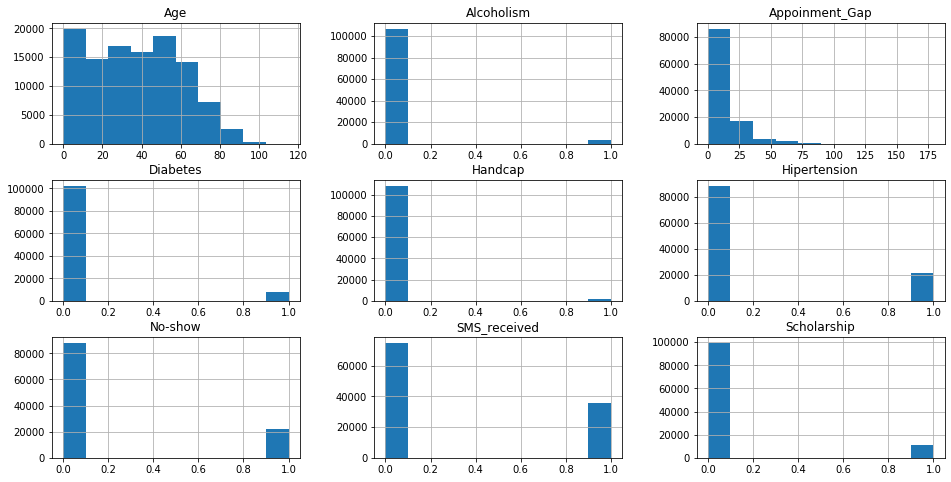

In [22]:
#plotting a histogram to see the data distribution
data.hist(figsize = (16,8));

    Above histogram shows
        Patients age mainly range from 0 to 70
        Most of the patients is appointed on the same day as that of scheduling
        No of patients handicaped is very low
        Hypertension and No-show patients show a similar trend in ploting

In [23]:
#grouping by No-show
showdata = data.groupby('No-show').mean()

In [24]:
showdata.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Appoinment_Gap
No-show,,,,,,,,
0,37.777090,0.093880,0.204068,0.073573,0.030404,0.019035,0.291429,8.758986
1,34.279307,0.115701,0.168275,0.063844,0.030306,0.016343,0.438872,15.834778


    Average age of patients who doesnt show up is 34 compared to the age of 38 for patients showing up
    Higher the appoinment gap higher is the chance of showing up, average appointment gap for patient showing up is 16
    Almost 44% of patients who showed up received a message. Needs further investigation


### Question 1. How does the gap between Scheduled day and Appointment affect the number of patients showing up? 

In [25]:
data['Appoinment_Gap'].describe()

count    110322.000000
mean         10.187524
std          15.257955
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Appoinment_Gap, dtype: float64

    Appointment_Gap vary widely, so we will add a new column that categorize the data to four categories to show the gap period. 
    for value ranging from 
    -1 to 2 : Low
    2 to 7 : moderate
    7 to 19 : medium
    19 to 179 : High

In [26]:
#Create categorical variable
bin_names = ['Low','moderate','medium','High']

In [27]:
data['Appointment_gap_level'] = pd.qcut(data['Appoinment_Gap'], q=5, precision=0, labels = bin_names, duplicates = 'drop')

In [28]:
data['Appointment_gap_level'].value_counts()

Low         50401
High        21892
moderate    20207
medium      17822
Name: Appointment_gap_level, dtype: int64

In [29]:
# checking the new column
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Appoinment_Gap,Appointment_gap_level
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,Low
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,Low
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,Low
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,Low
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,Low


In [30]:
#counting number of patients in each Gap level grouped by No-show
gap_count = data.groupby(['No-show','Appointment_gap_level']).count()['Age']
gap_count

No-show  Appointment_gap_level
0        Low                      45906
         moderate                 15159
         medium                   12287
         High                     14697
1        Low                       4495
         moderate                  5048
         medium                    5535
         High                      7195
Name: Age, dtype: int64

In [31]:
# proportion on patients based on Appointment Gap level.
show_gap = gap_count[1]/(gap_count[1] + gap_count[0])
noshow_gap = gap_count[0]/(gap_count[1] + gap_count[0])

In [32]:
# to plot the x axis
x = np.arange(len(show_gap))
width = 0.35

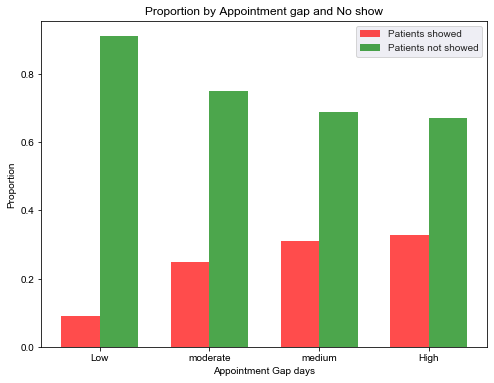

In [33]:
#plot bar
plt.figure(figsize = (8,6))
show_bar = plt.bar(x , show_gap, width, color = 'r', alpha = 0.7, label = 'Patients showed');
noshow_bar = plt.bar(x + width , noshow_gap, width, color = 'g', alpha = 0.7, label = 'Patients not showed');
#title and labels
plt.ylabel('Proportion')
plt.xlabel('Appointment Gap days')
plt.title('Proportion by Appointment gap and No show')
locations = x + width / 2  # xtick locations
labels = ['Low', 'moderate', 'medium', 'High']  # xtick labels
plt.xticks(locations, labels)
sns.set_style('darkgrid')
# legend
plt.legend()

    From the graph, it can be seen that, when the appointment day is same or closer to scheduled day very less patients showup. 
    91% of patients skip the appoinment when gap in appointment day is less than 2, only 9 % shows up.
    Where-as when the appointment gap gets to be in medium or high range the percentage of patients showing up increases to 32%.
    That is when the gap in appointment is more than 7 days more patients tends to show up

### Question 2. Does patients receiving an SMS from hospital increases the chance  of patients showing up?

In [34]:
#ploting a bar chart
def bar_chart(feature):
    showed = data.copy()[data["No-show"] == 1][feature].value_counts()
    not_showed = data.copy()[data["No-show"] == 0][feature].value_counts()
    df = pd.DataFrame([showed,not_showed])
    df.index = ["showed","notshowed"]
    df.plot(kind = "bar", stacked = True)
   
  

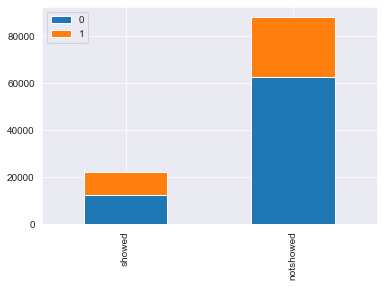

In [35]:
bar_chart('SMS_received')

    In first look, people without receiving SMS showed up more compared to people with an SMS, and a large number of patients even after receiving the SMS doesn't turns up. Which makes us think that sending an SMS doesn't increase the chance of patients showing up.  
    But when we closely monitor the graph, there is a dramatic decrease in patients not showed up by the help of SMS. So we will compare the data based on proportion and see if receiving SMS helps.

In [36]:
#count of people based on SMS_received grouped by No-show
sms_count = data.groupby(['No-show','SMS_received']).count()['Age']
sms_count

No-show  SMS_received
0        0               62389
         1               25660
1        0               12498
         1                9775
Name: Age, dtype: int64

In [37]:
# proportion on patients shown, with or without an SMS
show_sms = sms_count[1]/(sms_count[1] + sms_count[0])
noshow_sms = sms_count[0]/(sms_count[1] + sms_count[0])


In [38]:
#to set the location for graph
y = np.arange(len(show_sms))
width = 0.35

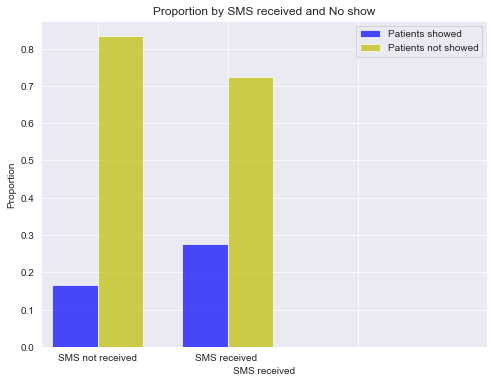

In [39]:
#plot bar
plt.figure(figsize = (8,6))
show_bar = plt.bar(y , show_sms, width, color = 'b', alpha = 0.7, label = 'Patients showed')
noshow_bar = plt.bar(y + width , noshow_sms, width, color = 'y', alpha = 0.7, label = 'Patients not showed')
#title and labels
plt.ylabel('Proportion')
plt.xlabel('SMS received')
plt.title('Proportion by SMS received and No show')
locations = x + width / 2  # xtick locations
labels = ['SMS not received','SMS received ']  # xtick labels
plt.xticks(locations, labels)
sns.set_style('darkgrid')
# legend
plt.legend()

    Here we can see that patients showing up without SMS is 16% whereas a kind of a message as a remainder increases the proportion of patients showing up to 27%. So by increaing the number of SMS sent to patients can help in increasing the number of patients showed. it can be further shown by a statistical data.

In [40]:
sms_data = data.groupby('SMS_received')['No-show'].mean()
sms_data

SMS_received
0    0.166891
1    0.275857
Name: No-show, dtype: float64

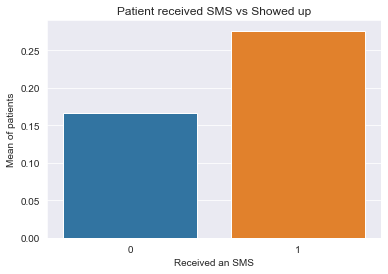

In [41]:
sns.barplot(sms_data.index , sms_data)
plt.title("Patient received SMS vs Showed up")
plt.ylabel("Mean of patients");
plt.xlabel('Received an SMS');

    With an SMS received people tend to show more by 11 %. 

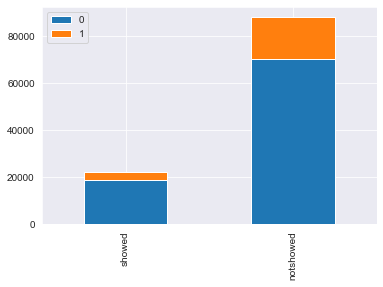

In [42]:
bar_chart('Hipertension')

    Hipertension doesnt shows to be a reason for patients to show up. As patients with hipertension skip the appoinment

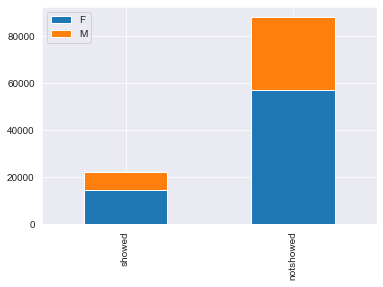

In [43]:
bar_chart('Gender')

    Females seems to be visiting hospitals more, but both genders seem not to show for their appointments at the same rate, meaining gender doesn't affect patients showing up.

<a id='conclusions'></a>
## 4. Conclusions


The analysis on data tried to solve the question of what factors are important in order to predict if a patient will show up for their scheduled appointment, the factors that are likely to be affecting patients showing up are the following:

1. The higher the gap between the scheduled day and the appointment day,higher the chance of patients showing up for their appointments.
2. Sending an SMS with a reminder about the appoinment does increase the number of patients showing up by 11% compared to the patients who didn't receive a message. 


In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295